In [ ]:
import numpy as np

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt   

import torch
import torch.nn as nn

import torch.nn.functional as F
import torch.optim as optim
from torch.nn.utils.rnn import pad_sequence,pack_padded_sequence,pack_sequence,pad_packed_sequence

import pickle


torch.manual_seed(1)

In [ ]:
rela_embedding=pd.read_csv('./data/KRAL_Embedding_Model_WINE_D032-rela.csv')
tail_embedding=pd.read_csv('./data/KRAL_Embedding_Model_WINE_D032-tail.csv')
x_test = pd.read_csv("./data/wine_x_test.csv").drop('Unnamed: 0',axis=1)
polish_train_val=pd.read_csv("./data/wine_train_val.csv").drop('Unnamed: 0',axis=1)
y_train_val=pd.read_csv("./data/y_wine_trainval.csv").drop('Unnamed: 0',axis=1)
y_test=pd.read_csv("./data/y_test_wine.csv").drop('Unnamed: 0',axis=1)


In [ ]:
print(sum(y_train_val['quality'])/len(y_train_val))
print(sum(y_test['quality'])/len(y_test))

0.34959871589085073
0.3443223443223443


In [ ]:
filename='./data/wine_test_notnull.pickle'
with open(filename, 'rb') as f:
    # deserialize the list and load it from the file
    loaded_test_notnull_lst = pickle.load(f)

test_notnull_len=[]
for i in range(len(loaded_test_notnull_lst)):
    test_notnull_len.append(len(loaded_test_notnull_lst[i]))

test_integrate=[]
for i in range(len(loaded_test_notnull_lst)):
  test_integrate.append(torch.tensor(loaded_test_notnull_lst[i]))

In [ ]:
trainval_filename='./data/wine_train_val_notnull.pickle'
with open(trainval_filename, 'rb') as f:
    # deserialize the list and load it from the file
    loaded_trainval_notnull_lst = pickle.load(f)

In [ ]:
trainval_len=[]
for i in range(len(loaded_trainval_notnull_lst)):
    trainval_len.append(len(loaded_trainval_notnull_lst[i]))

In [ ]:
from collections import Counter

test_notnull_count = Counter(test_notnull_len)
trainval_count=Counter(trainval_len)
print(test_notnull_count)
print(trainval_count)

test_batch_avg=round(np.average(list(dict(test_notnull_count).keys())))

Counter({9: 232, 10: 192, 8: 96, 7: 22, 11: 3, 6: 1})
Counter({9: 1231, 10: 1214, 8: 541, 7: 102, 11: 12, 6: 11, 12: 3, 5: 1})


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset

# define a custom dataset class
class MyDataset(Dataset):
    def __init__(self, data, labels):
        # sort the data and labels based on the length of each item in data
        self.data, self.labels = zip(*sorted(zip(data, labels), key=lambda x: len(x[0]), reverse=True))
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        x = torch.tensor(self.data[idx])
        y = self.labels[idx]
        return x, y

def collate_fn(data):
    input_data = [d[0] for d in data]
    y = [d[1] for d in data]
    input_data = pad_sequence(input_data, batch_first=True)
    input_data = torch.flip(input_data, dims=[1])
    return input_data, torch.tensor(y)



In [ ]:
test_batch_avg=round(np.average(list(dict(test_notnull_count).keys())))


test_dataset = MyDataset(test_integrate, y_test['quality'].values.tolist())

test_dataloader = DataLoader(test_dataset, batch_size=test_batch_avg, collate_fn=collate_fn)

# iterate over batches of data and labels
for batch_data, batch_labels in test_dataloader:
    # print the batch data and labels
    print(batch_data.size())
    print(batch_labels.size())

torch.Size([8, 11, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])
torch.Size([8, 10, 64])
torch.Size([8])


<ipython-input-10-405d3086c905>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(self.data[idx])


In [ ]:
with open('./data/train_data.pickle', 'rb') as f:
    # serialize the list and write it to the file
    train_data=pickle.load(f)

with open('./data/val_data.pickle', 'rb') as f:
    # serialize the list and write it to the file
    val_data=pickle.load(f)

with open('./data/train_y.pickle', 'rb') as f:
    # serialize the list and write it to the file
    train_y=pickle.load(f)

with open('./data/val_y.pickle', 'rb') as f:
    # serialize the list and write it to the file
    val_y=pickle.load(f)

In [ ]:
def batch_size_func(data_tensor):
  length_lst=[]
  for i in range(len(data_tensor)):
    length_lst.append(len(data_tensor[i]))
  len_counter=Counter(length_lst)
  batch_avg=round(np.average(list(dict(len_counter).keys())))
  return batch_avg


In [ ]:
train_batch_size_avg=batch_size_func(train_data)
val_batch_size_avg=batch_size_func(val_data)
train_dataset = MyDataset(train_data, train_y)
val_dataset=MyDataset(val_data, val_y)
train_dataloader = DataLoader(train_dataset, batch_size=train_batch_size_avg, collate_fn=collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=val_batch_size_avg, collate_fn=collate_fn)

for batch_data, batch_labels in val_dataloader:
    print(batch_data.size())
    print(batch_labels.size())

torch.Size([9, 12, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])
torch.Size([9, 10, 64])
torch.Size([9])


In [ ]:
import torch
from torch import nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

class bilstm_attention(nn.Module):
    def __init__(self, input_size, hidden_units,num_classes):
        super().__init__()
        self.input_size = input_size  # this is the number of features
        self.num_classes=num_classes
        self.hidden_units = hidden_units
        
        self.num_layers = 2

        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_units,
            batch_first=True,
            num_layers=self.num_layers,
            bidirectional=True,
            dropout=0.1
        )

        self.tanh1 = nn.Tanh()
        self.w = nn.Parameter(torch.Tensor(self.hidden_units * 2, 1))
        self.tanh2 = nn.Tanh()
        self.fc = nn.Linear(self.hidden_units * 2, self.num_classes)
        nn.init.uniform_(self.w, -0.1, 0.1)

       

    def forward(self, x):
        H, _ = self.lstm(x, None) # [batch_size, seq_len, hidden_size * 2]
        M = self.tanh1(H)  # [batch_size, seq_len, hidden_size * 2]
        # tensor operation
        alpha = F.softmax(torch.matmul(M, self.w), dim=1)# [batch_size, seq_len, 1]
        # When tensor elements are multiplied, tensor broadcasting occurs so that the dimensions of the tensor satisfy the condition
        out = H * alpha  # [batch_size, seq_len, hidden_size * 2]
        out = torch.sum(out, 1) # [batch_size,hidden_size * 2]  
        out = self.tanh2(out)
        out = self.fc(out)# [batch_size,num_classes]
        return out
        

In [ ]:
batch_data,batch_label=next(iter(train_dataloader))
model = bilstm_attention(input_size=batch_data.size()[2], hidden_units=512,num_classes=1)
re_out=model(batch_data)
print(batch_data.size())
print(re_out.size())
print(re_out)



torch.Size([8, 12, 64])
torch.Size([8, 1])
tensor([[-0.0035],
        [-0.0036],
        [-0.0036],
        [-0.0020],
        [-0.0028],
        [-0.0021],
        [-0.0037],
        [-0.0035]], grad_fn=<AddmmBackward0>)


In [ ]:
def train_model(device,train_loader, val_loader, model, patience, n_epochs):
    
    # to track the training loss as the model trains
    train_losses = []
    # to track the validation loss as the model trains
    valid_losses = []
    # to track the average training loss per epoch as the model trains
    avg_train_losses = []
    # to track the average validation loss per epoch as the model trains
    avg_valid_losses = [] 
    
    num_batches_train = len(train_loader)
    total_loss = 0

    # initialize the early_stopping object
    early_stopping = EarlyStopping(patience=patience, verbose=True)
    
    for epoch in range(1, n_epochs + 1):

        ###################
        # train the model #
        ###################
        model.train() # prep model for training
        for X, y in train_loader:
          
          X=X.to(device) 
          y=y.to(device,dtype=torch.float)
          #y=y.float() 
          output = model(X) 
          output=output.squeeze()
          
          # clear the gradients of all optimized variables
          optimizer.zero_grad()
          
          # calculate the loss
          loss = criterion(output, y)
          # backward pass: compute gradient of the loss with respect to model parameters
          loss.backward()
          # perform a single optimization step (parameter update)
          optimizer.step()
          # record training loss
          train_losses.append(loss.item())

        ######################    
        # validate the model #
        ######################
        model.eval() # prep model for evaluation
        for data, target in val_loader:
            # forward pass: compute predicted outputs by passing inputs to the model
            data=data.to(device) 
            target=target.to(device,dtype=torch.float)
            output = model(data)
            output=output.squeeze()
            #target=target.float()
            # calculate the loss
            loss = criterion(output, target)
            # record validation loss
            valid_losses.append(loss.item())

        # print training/validation statistics 
        # calculate average loss over an epoch
        train_loss = np.average(train_losses)
        valid_loss = np.average(valid_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)
        
        epoch_len = len(str(n_epochs))
        
        print_msg = (f'[{epoch:>{epoch_len}}/{n_epochs:>{epoch_len}}] ' +
                     f'train_loss: {train_loss:.5f} ' +
                     f'valid_loss: {valid_loss:.5f}')
        
        print(print_msg)
        
        # clear lists to track next epoch
        train_losses = []
        valid_losses = []
        
        # early_stopping needs the validation loss to check if it has decresed, 
        # and if it has, it will make a checkpoint of the current model
        early_stopping(valid_loss, model,n_epochs+1, optimizer,criterion)
        
        if early_stopping.early_stop:
            print("Early stopping")
            break
        
    # load the last checkpoint with the best model
    checkpoint = torch.load('./pytorch/model/epoch5000_pa300_all1009/save_checkpoint.pt')
    model.load_state_dict(checkpoint['model_state_dict'])
    with open('./pytorch/model/epoch5000_pa300_all1009/avg_train_losses.pickle', 'wb') as f:
      pickle.dump(avg_train_losses, f)
    with open('./pytorch/model/epoch5000_pa300_all1009/avg_valid_losses.pickle', 'wb') as f:
      pickle.dump(avg_valid_losses, f)
    return model, avg_train_losses, avg_valid_losses

patience 300, epoch 5000, optimzier SGD

In [ ]:
from pytorchtools_save_epoch import EarlyStopping
device='cuda' if torch.cuda.is_available() else 'cpu'
model = bilstm_attention(input_size=batch_data.size()[2], hidden_units=512,num_classes=1).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001,momentum=0.85)
patience=300
bilstm_atten_savemodel_patience_300,train_loss,valid_loss = train_model(device,train_dataloader, val_dataloader, model, patience, 5000)



[   1/5000] train_loss: 0.67337 valid_loss: 0.65943
Validation loss decreased (inf --> 0.659433).  Saving model ...
[   2/5000] train_loss: 0.65388 valid_loss: 0.65038
Validation loss decreased (0.659433 --> 0.650376).  Saving model ...
[   3/5000] train_loss: 0.64890 valid_loss: 0.64801
Validation loss decreased (0.650376 --> 0.648009).  Saving model ...
[   4/5000] train_loss: 0.64758 valid_loss: 0.64735
Validation loss decreased (0.648009 --> 0.647349).  Saving model ...
[   5/5000] train_loss: 0.64718 valid_loss: 0.64714
Validation loss decreased (0.647349 --> 0.647141).  Saving model ...
[   6/5000] train_loss: 0.64704 valid_loss: 0.64706
Validation loss decreased (0.647141 --> 0.647061).  Saving model ...
[   7/5000] train_loss: 0.64698 valid_loss: 0.64702
Validation loss decreased (0.647061 --> 0.647023).  Saving model ...
[   8/5000] train_loss: 0.64694 valid_loss: 0.64700
Validation loss decreased (0.647023 --> 0.646998).  Saving model ...
[   9/5000] train_loss: 0.64691 valid

patience = 300, all epoch = 5000, final epoch=1009

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001,momentum=0.85)
new_savemodel_patience_300 = bilstm_attention(input_size=batch_data.size()[2], hidden_units=512,num_classes=1)
checkpoint_path='./pytorch/model/epoch5000_pa300_all1009/save_checkpoint.pt'
checkpoint = torch.load(checkpoint_path)
new_savemodel_patience_300.load_state_dict(checkpoint['model_state_dict'])


<All keys matched successfully>

<Axes: >

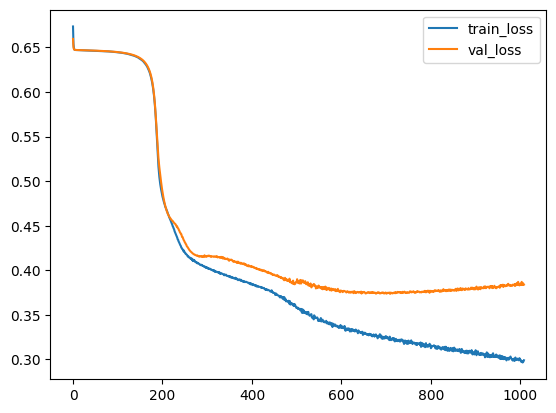

In [ ]:
with open('./pytorch/model/epoch5000_pa300_all1009/avg_valid_losses.pickle', 'rb') as f:
    # serialize the list and write it to the file
    avg_valid_losses=pickle.load(f)

with open('./pytorch/model/epoch5000_pa300_all1009/avg_train_losses.pickle', 'rb') as f:
    # serialize the list and write it to the file
    avg_train_losses=pickle.load(f)

loss_df=pd.DataFrame({'train_loss':avg_train_losses, 'val_loss':avg_valid_losses})
loss_df.plot()

In [ ]:
with open('./pytorch/model/epoch5000_pa300_all1009/avg_valid_losses.pickle', 'rb') as f:
    # serialize the list and write it to the file
    avg_valid_losses=pickle.load(f)

with open('./pytorch/model/epoch5000_pa300_all1009/avg_train_losses.pickle', 'rb') as f:
    # serialize the list and write it to the file
    avg_train_losses=pickle.load(f)

loss_df=pd.DataFrame({'train_loss':avg_train_losses, 'val_loss':avg_valid_losses})
loss_df

,train_loss,val_loss
0,"[0.6733742834447505, 0.6538803724797217, 0.648...","[0.6594333929511217, 0.650376093502228, 0.6480..."


In [ ]:

def predict(data_loader, model_1):

    output = torch.tensor([])
    model_1.eval()
    with torch.no_grad():
        for X, _ in data_loader:
            #X=X.to(device)  
            y_star = model_1(X).squeeze()
            output = torch.cat((output, y_star), 0)
    
    return output
output_val=predict(val_dataloader, new_savemodel_patience_300).numpy()
output_test=predict(test_dataloader, new_savemodel_patience_300).numpy()

print(len(output_val))
print(len(output_test))   


<ipython-input-10-405d3086c905>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(self.data[idx])


935
546


extract original test labels and val labels from dataloaders since we've changed the order of the original labels when creating data_loader

In [ ]:
test_labels = []
for batch_data, batch_labels in test_dataloader:
    test_labels.extend(batch_labels.tolist())

val_labels = []
for batch_data, batch_labels in val_dataloader:
    val_labels.extend(batch_labels.tolist())


print(len(test_labels))
print(len(val_labels))




<ipython-input-10-405d3086c905>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(self.data[idx])


546
935


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score  
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score


precision, recall, thresholds = precision_recall_curve(val_labels, output_val)

df_recall_precision = pd.DataFrame({'Precision':precision[:-1],'Recall':recall[:-1],'Threshold':thresholds})
df_recall_precision


,Precision,Recall,Threshold
0,0.349733,1.000000,-9.574838
1,0.350107,1.000000,-9.180412
2,0.350482,1.000000,-8.965824
3,0.350858,1.000000,-8.865181
4,0.351235,1.000000,-8.854237
...,...,...,...
899,1.000000,0.015291,4.837714
900,1.000000,0.012232,4.922742
901,1.000000,0.009174,5.037555
902,1.000000,0.006116,5.521238


In [ ]:
np.seterr(divide='ignore', invalid='ignore')
f1_score = (2 * precision * recall) / (precision + recall)

# Find the optimal threshold
#findex = np.argmax(f1_score)
findex=list(f1_score).index(max(f1_score))
thresholdOpt = round(thresholds[findex], ndigits = 4)
fscoreOpt = round(f1_score[findex], ndigits = 4)
recallOpt = round(recall[findex], ndigits = 4)
precisionOpt = round(precision[findex], ndigits = 4)
print('Best Threshold: {} , F-Score: {}'.format(thresholdOpt, fscoreOpt))
print('Recall: {}, Precision: {}'.format(recallOpt, precisionOpt))

from sklearn.metrics import precision_score, classification_report, recall_score, f1_score, roc_auc_score, confusion_matrix, accuracy_score
y_pre_test=output_test.flatten().tolist()
defaulter_decision_test = (y_pre_test >= thresholdOpt)

print(classification_report(test_labels, defaulter_decision_test))
tn, fp, fn, tp = confusion_matrix(test_labels, defaulter_decision_test).ravel()
print(tn, fp, fn, tp)  #recall=TP/TP+FN
f1_test = f1_score(test_labels, defaulter_decision_test, average='macro') # use 'micro' or 'weighted' for multi-class problems depending on the problem
print(f'test dataset F1 Score: {f1_test}')

Best Threshold: -0.765500009059906 , F-Score: 0.7869
Recall: 0.8807, Precision: 0.7111
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       358
           1       0.69      0.85      0.76       188

    accuracy                           0.82       546
   macro avg       0.80      0.82      0.80       546
weighted avg       0.83      0.82      0.82       546

286 72 29 159
test dataset F1 Score: 0.8044377932316029
